<a href="https://colab.research.google.com/github/amandafriedmann/NEUR-Data-Analysis/blob/main/FINAL_PROJECT_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atherosclerosis data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
atherosclerosis_data = pd.read_csv('https://raw.githubusercontent.com/amandafriedmann/NEUR-Data-Analysis/main/ATHERO%20REAL%20DATA.csv')
microinfarcts_data = pd.read_csv('https://raw.githubusercontent.com/amandafriedmann/NEUR-Data-Analysis/main/MICRO%20REAL%20DATA.csv')
print(atherosclerosis_data.shape)
print(microinfarcts_data.shape)
print(atherosclerosis_data)
print(microinfarcts_data)

(84, 3)
(84, 3)
   Atherosclerosis  number of Hematoxylin positive nuclei_Grey matter  \
0             Mild                                             140399   
1             Mild                                              86781   
2         Moderate                                             117450   
3             Mild                                              47069   
4             Mild                                              58939   
..             ...                                                ...   
79        Moderate                                              45037   
80            Mild                                              77976   
81        Moderate                                              85695   
82            Mild                                              93682   
83        Moderate                                              91856   

    average Hematoxylin positive nucleus area_Grey matter  
0                                           27.

<Axes: ylabel='Atherosclerosis'>

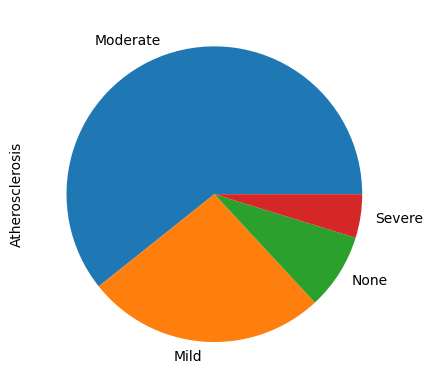

In [23]:
#Atherosclerosis grouping variable distribution
atherosclerosis_data['Atherosclerosis'].value_counts().plot(kind='pie')

Text(0, 0.5, 'Frequency')

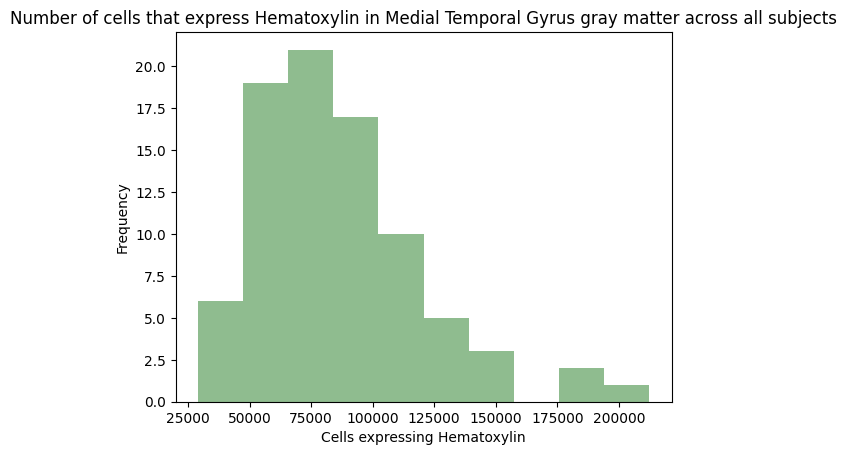

In [24]:
#Atherosclerosis number of Hematoxylin positive nuclei_Grey matter distribution
atherosclerosis_data['number of Hematoxylin positive nuclei_Grey matter'].plot(kind='hist', color = 'darkseagreen')
plt.title('Number of cells that express Hematoxylin in Medial Temporal Gyrus gray matter across all subjects')
plt.xlabel('Cells expressing Hematoxylin')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

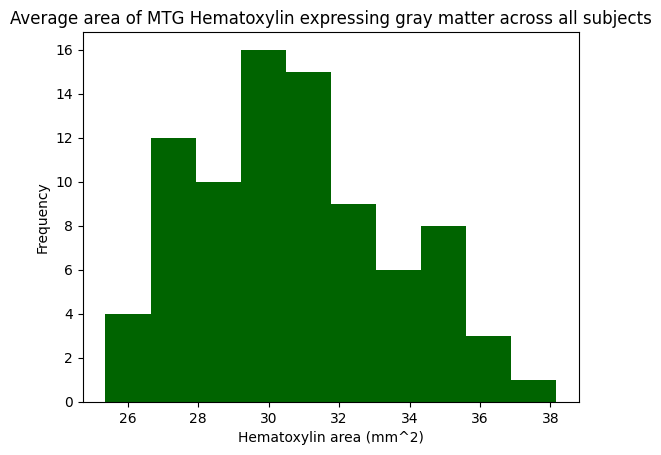

In [25]:
#Atherosclerosis average Hematoxylin positive nucleus area_Grey matter distribution
atherosclerosis_data['average Hematoxylin positive nucleus area_Grey matter'].plot(kind='hist', color = 'darkgreen')
plt.title('Average area of MTG Hematoxylin expressing gray matter across all subjects')
plt.xlabel('Hematoxylin area (mm^2)')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Hematoxylin cellular expression compared to average Hematoxylin area collapsed between varying groups of Atherosclerosis severity')

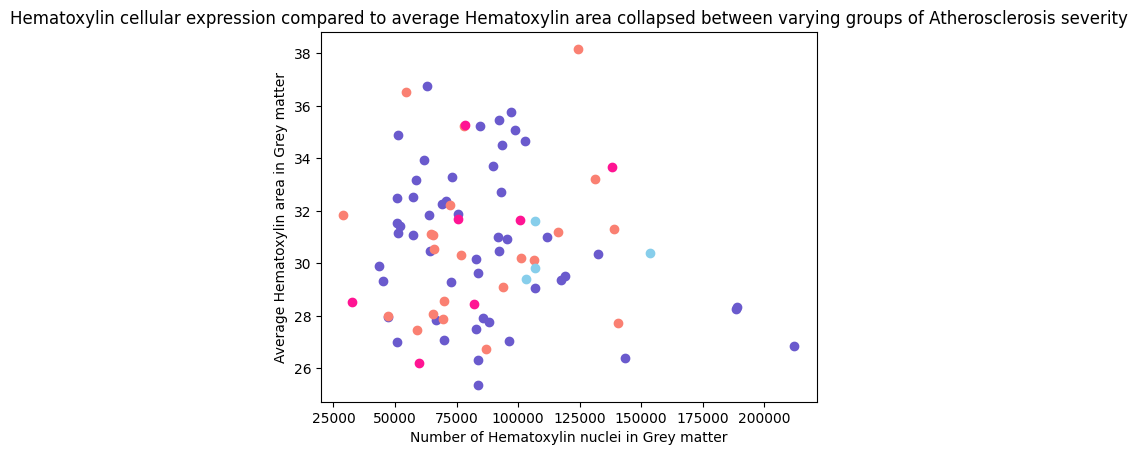

In [41]:
#scatterplot of dependent variables across groups
moderate_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Moderate']
mild_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Mild']
severe_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'Severe']
none_df = atherosclerosis_data[atherosclerosis_data['Atherosclerosis'] == 'None']

plt.scatter(moderate_df['number of Hematoxylin positive nuclei_Grey matter'],moderate_df['average Hematoxylin positive nucleus area_Grey matter'], color = "slateblue")
plt.scatter(mild_df['number of Hematoxylin positive nuclei_Grey matter'],mild_df['average Hematoxylin positive nucleus area_Grey matter'], color = "salmon")
plt.scatter(severe_df['number of Hematoxylin positive nuclei_Grey matter'],severe_df['average Hematoxylin positive nucleus area_Grey matter'], color = "skyblue")
plt.scatter(none_df['number of Hematoxylin positive nuclei_Grey matter'],none_df['average Hematoxylin positive nucleus area_Grey matter'], color = "deeppink")

plt.xlabel('Number of Hematoxylin nuclei in Grey matter')
plt.ylabel('Average Hematoxylin area in Grey matter')
plt.title('Hematoxylin cellular expression compared to average Hematoxylin area collapsed between varying groups of Atherosclerosis severity')